In [1]:
%matplotlib inline
%matplotlib notebook
import tqdm, copy
import random, os
import pandas as pd
from tqdm import trange
import matplotlib.pyplot as plt
from collections import defaultdict
from overcooked_ai_py.utils import save_pickle
from human_aware_rl.utils import set_global_seed
from human_aware_rl.human.process_dataframes import *
from human_aware_rl.static import *
import pickle as pkl

set_global_seed(1884)

In [2]:
import ast
import json

# Define Helper Functions

In [3]:
def json_eval(s):
    json_acceptable_string = s.replace("'", "\"")
    d = json.loads(json_acceptable_string)
    return d

# Import Cleaned Data

In [4]:
hh_all_2020_file = '/Users/michellezhao/Documents/overcooked_research/human_aware_rl/human_aware_rl/static/human_data/cleaned/2020_hh_trials_all.pickle'
hh_all_2019_file = '/Users/michellezhao/Documents/overcooked_research/human_aware_rl/human_aware_rl/static/human_data/cleaned/2019_hh_trials_all.pickle'






In [5]:
with open(hh_all_2020_file,'rb') as file:
    humans_2020_file = pkl.load(file)
    
with open(hh_all_2019_file,'rb') as file:
    humans_2019_file = pkl.load(file)



In [6]:
humans_2020_file.to_csv('humans_all_2020.csv')

In [7]:
humans_2019_file.to_csv('humans_all_2019.csv')

In [8]:
humans_2020_file.columns

Index(['state', 'joint_action', 'reward', 'time_left', 'score', 'time_elapsed',
       'cur_gameloop', 'layout', 'layout_name', 'trial_id', 'player_0_id',
       'player_1_id', 'player_0_is_human', 'player_1_is_human',
       'cur_gameloop_total', 'score_total', 'button_press',
       'button_press_total', 'timesteps_since_interact',
       'button_presses_per_timstep'],
      dtype='object')

In [9]:
old_trials = humans_2019_file
new_trials = humans_2020_file

In [10]:
all_trials = pd.concat([old_trials, new_trials])

In [11]:
all_trials.columns

Index(['Unnamed: 0', 'cur_gameloop', 'joint_action', 'layout', 'layout_name',
       'reward', 'score', 'state', 'time_elapsed', 'time_left', 'trial_id',
       'player_0_is_human', 'player_1_is_human', 'player_0_id', 'player_1_id',
       'cur_gameloop_total', 'score_total', 'button_press',
       'button_press_total', 'timesteps_since_interact',
       'button_presses_per_timstep'],
      dtype='object')

In [12]:
len(all_trials['trial_id'].unique())

373

# Process New Trials

In [13]:
all_trials = old_trials

In [14]:
all_trials.columns

Index(['Unnamed: 0', 'cur_gameloop', 'joint_action', 'layout', 'layout_name',
       'reward', 'score', 'state', 'time_elapsed', 'time_left', 'trial_id',
       'player_0_is_human', 'player_1_is_human', 'player_0_id', 'player_1_id',
       'cur_gameloop_total', 'score_total', 'button_press',
       'button_press_total', 'timesteps_since_interact',
       'button_presses_per_timstep'],
      dtype='object')

In [15]:
layouts_list = all_trials['layout_name'].unique()
print('layouts_list', layouts_list)


layouts_list ['cramped_room' 'asymmetric_advantages' 'coordination_ring' 'random3'
 'random0']


In [16]:
num_trials = len(all_trials['trial_id'].unique())
print('num_trials', num_trials)


num_trials 86


In [17]:
# Compute num trials per environment
trials_per_environment = {}
for layout_name in layouts_list:
    n_trials = len(all_trials[all_trials['layout_name']==layout_name]['trial_id'].unique())
    print(layout_name, n_trials)
    trials_per_environment[layout_name] = n_trials


cramped_room 19
asymmetric_advantages 19
coordination_ring 18
random3 18
random0 12


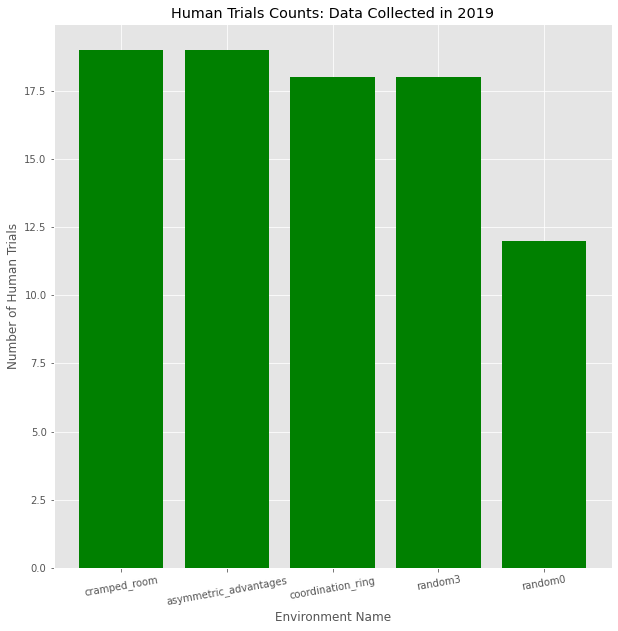

In [18]:
%matplotlib inline
plt.style.use('ggplot')

plt.figure(figsize=(10,10))
x = list(trials_per_environment.keys())
energy = list(trials_per_environment.values())

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, energy, color='green')
plt.xlabel("Environment Name")
plt.ylabel("Number of Human Trials")
plt.title("Human Trials Counts: Data Collected in 2019")

plt.xticks(x_pos, x, rotation=10)
# ax.set_xticklabels( range(0,N,10), rotation=45 )

plt.show()



num_trials 86
cramped_room 19
asymmetric_advantages 19
coordination_ring 18
random3 18
random0 12


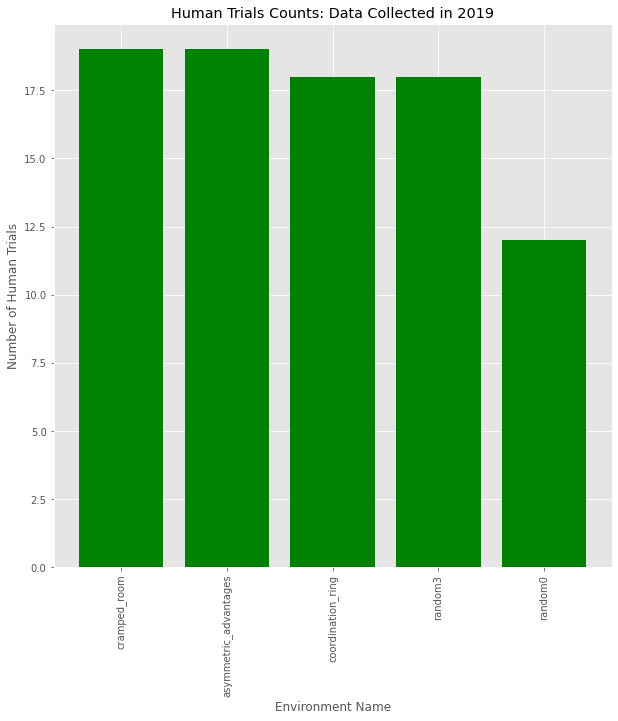

In [19]:
layouts_list = old_trials['layout_name'].unique()
num_trials = len(old_trials['trial_id'].unique())
print('num_trials', num_trials)


# Compute num trials per environment
trials_per_environment = {}
for layout_name in layouts_list:
    n_trials = len(old_trials[old_trials['layout_name']==layout_name]['trial_id'].unique())
    print(layout_name, n_trials)
    trials_per_environment[layout_name] = n_trials


plt.figure(figsize=(10,10))
x = list(trials_per_environment.keys())
energy = list(trials_per_environment.values())

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, energy, color='green')
plt.xlabel("Environment Name")
plt.ylabel("Number of Human Trials")
plt.title("Human Trials Counts: Data Collected in 2019")

plt.xticks(x_pos, x, rotation=90)
# ax.set_xticklabels( range(0,N,10), rotation=45 )

plt.show()



# Plot Layout

In [22]:
old_trials['layout_name'].unique()

array(['cramped_room', 'asymmetric_advantages', 'coordination_ring',
       'random3', 'random0'], dtype=object)

In [20]:
# for index, row in df.iterrows():
#     print(row['c1'], row['c2'])


In [30]:
layout = eval(old_trials[old_trials['layout_name']=='random3']['layout'].to_numpy()[0])


In [31]:
layout = np.array(layout)

In [32]:
layout = np.array([list(elem) for elem in layout])

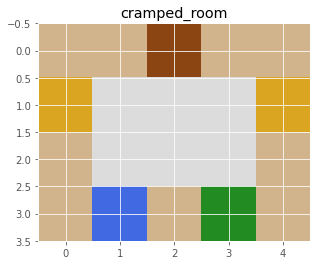

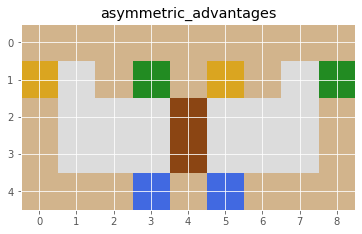

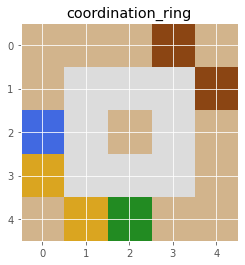

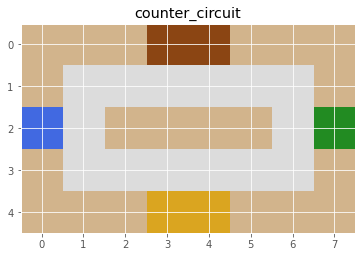

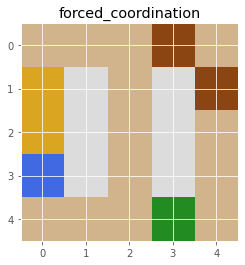

In [72]:
layout_names = ['cramped_room', 'asymmetric_advantages', 'coordination_ring',
       'random3', 'random0']
layout_titles = ['cramped_room', 'asymmetric_advantages', 'coordination_ring',
       'counter_circuit', 'forced_coordination']


#     layout = np.array(layout)
# print(layout)

def display_layout(layout, title):
    grid_display = np.zeros((layout.shape[0], layout.shape[1], 3))
    for i in range(layout.shape[0]):
        for j in range(layout.shape[1]):
            # Floor = gray
            grid_display[i,j,:] = [220,220,220]
            if layout[i,j] == 'X':
                # Counter = Tan
                grid_display[i,j,:] = [210,180,140]
            if layout[i,j] == 'P':
                # Pots = brown
                grid_display[i,j,:] = [139,69,19]
            if layout[i,j] == 'S':
                # Serve = Green
                grid_display[i,j,:] = [34,139,34]
            if layout[i,j] == 'O':
                # Onion = Yellow
                grid_display[i,j,:] = [218,165,32]
            if layout[i,j] == 'D':
                # Dishes = Blue
                grid_display[i,j,:] = [65,105,225]
            if layout[i,j] == 'T':
                # Tomato = Blue
                grid_display[i,j,:] = [255,69,0]
                
    plt.imshow(grid_display.astype(np.uint8), vmin=0, vmax=255)
    plt.title(title)
    plt.show()
                
for i in range(len(layout_names)):
    name = layout_names[i]
    title = layout_titles[i]
    layout = eval(old_trials[old_trials['layout_name']==name]['layout'].to_numpy()[0])
    layout = np.array([list(elem) for elem in layout])
    display_layout(layout, title)
    

# Figure out directions of Turning

In [59]:
layout_trials = old_trials[old_trials['layout_name']=='cramped_room']['trial_id'].unique()


In [60]:
layout_trials

array([  0,   5,  10,  15,  20,  45,  50,  55,  60,  65,  70,  75,  80,
        85,  90,  95, 100, 110, 115])

In [64]:
def compute_steps(p_data):
    n_steps = 0
    prev_loc = (p_data[0]['position'][1], p_data[0]['position'][0])
    for i in range(1, len(p_data)):
        new_loc = (p_data[i]['position'][1], p_data[i]['position'][0])
        if new_loc != prev_loc:
            n_steps += 1
            prev_loc = new_loc
    return n_steps
    
    
    

In [102]:
def compute_number_objects_picked(p_data):
    n_obj = 0
    objects = False
    for i in range(0, len(p_data)):
        new_loc = (p_data[i]['position'][1], p_data[i]['position'][0])
    
        if 'held_object' in p_data[i]:
            
#             print('found')
            if p_data[i]['held_object'] is not None and objects is False:
                if p_data[i]['held_object']['name']!='dish':
                    continue
                objects = True
                n_obj += 1

            if p_data[i]['held_object'] is None and objects is True:
#                 if p_data[i]['held_object']['name']!='onion':
#                     continue
                objects = False
#             n_obj += 1
    return n_obj
    

In [83]:
num_steps_all_players = []
for j in range(len(layout_trials)):
    trial_id = layout_trials[j]
    trial_df = old_trials[old_trials['trial_id']==trial_id]
    state_data = trial_df['state'].to_numpy()
    p1_data = []
    p2_data = []
    for i in range(1, len(state_data)):
        prev_state_x = json_eval(state_data[i-1])
        state_x = json_eval(state_data[i])
        p1_data.append(state_x['players'][0])
        p2_data.append(state_x['players'][1])
    
    p1_steps = compute_steps(p1_data)
    p2_steps = compute_steps(p2_data)
    num_steps_all_players.append(p1_steps)
    num_steps_all_players.append(p2_steps)
    

    
    

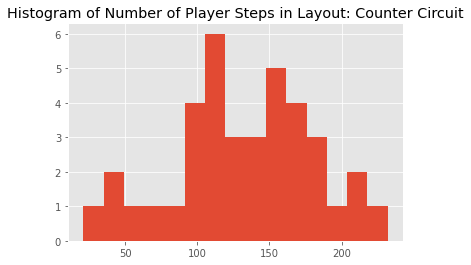

In [77]:
layout_name = 'Counter Circuit'
plt.hist(num_steps_all_players, bins=15)
plt.title("Histogram of Number of Player Steps in Layout: " + layout_name)
plt.show()

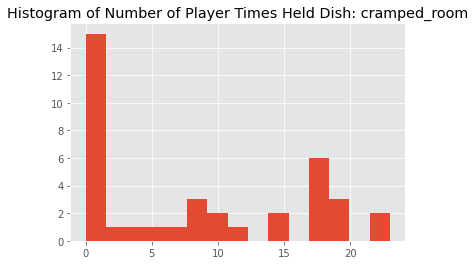

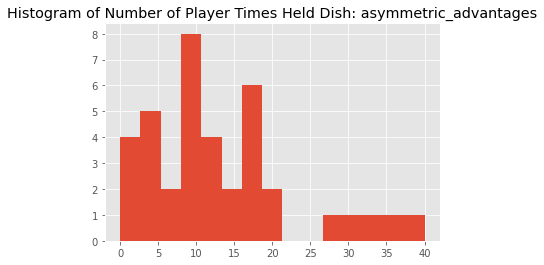

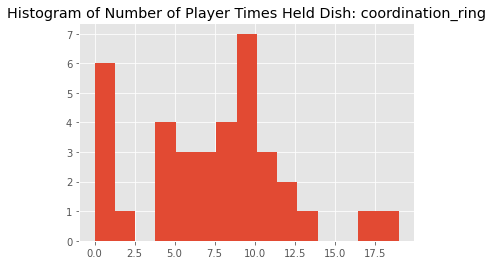

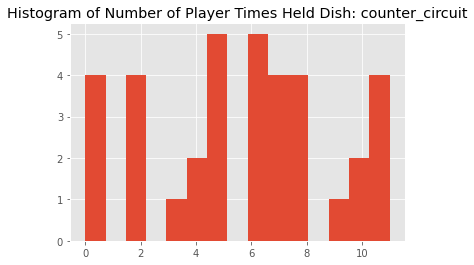

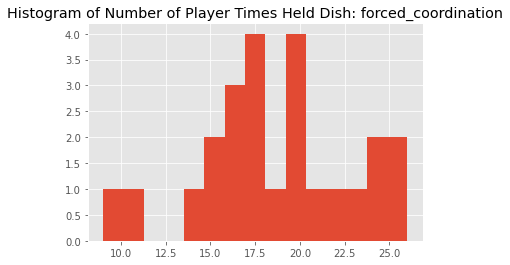

In [105]:
for i in range(len(layout_names)):
    name = layout_names[i]
    title = layout_titles[i]
    layout = eval(old_trials[old_trials['layout_name']==name]['layout'].to_numpy()[0])
    layout_trials = old_trials[old_trials['layout_name']==name]['trial_id'].unique()

    num_steps_all_players = []
    for j in range(len(layout_trials)):
        trial_id = layout_trials[j]
        trial_df = old_trials[old_trials['trial_id']==trial_id]
        state_data = trial_df['state'].to_numpy()
        p1_data = []
        p2_data = []
        for i in range(1, len(state_data)):
            prev_state_x = json_eval(state_data[i-1])
            state_x = json_eval(state_data[i])
            p1_data.append(state_x['players'][0])
            p2_data.append(state_x['players'][1])

        p1_steps = compute_number_objects_picked(p1_data)
        p2_steps = compute_number_objects_picked(p2_data)
        num_steps_all_players.append(p1_steps)
        num_steps_all_players.append(p2_steps)

#     layout_name = 'Counter Circuit'
    plt.hist(num_steps_all_players, bins=15)
    plt.title("Histogram of Number of Player Times Held Dish: " + title)
    plt.show()
    
    
    

TypeError: list indices must be integers or slices, not str

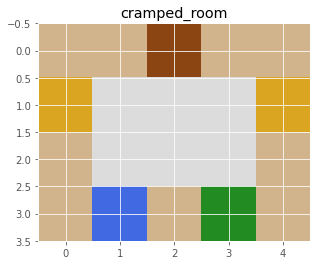

In [62]:
name = 'cramped_room'
title = 'cramped_room'
layout = eval(old_trials[old_trials['layout_name']==name]['layout'].to_numpy()[0])
layout = np.array([list(elem) for elem in layout])
display_layout(layout, title)

# plt.figure()
plt.plot(p2_data[:]['position'][1], p2_data[:]['position'][0])
plt.show()
    

In [21]:
trial_df.columns

Index(['state', 'joint_action', 'reward', 'time_left', 'score', 'time_elapsed',
       'cur_gameloop', 'layout', 'layout_name', 'trial_id', 'player_0_id',
       'player_1_id', 'player_0_is_human', 'player_1_is_human',
       'cur_gameloop_total', 'score_total', 'button_press',
       'button_press_total', 'timesteps_since_interact',
       'button_presses_per_timstep'],
      dtype='object')

In [24]:
state_data = trial_df['state'].to_numpy()

In [88]:
counter = 0
for i in range(1, len(state_data)):
    prev_state_x = json_eval(state_data[i-1])
    state_x = json_eval(state_data[i])
    p1_data = state_x['players'][0]
    p2_data = state_x['players'][1]
    
    if p1_data['held_object'] is not None:
        print('previous 1 location:::', prev_state_x['players'][0])
        print('p1_data:::', p1_data)
        print()
        counter += 1
        if counter > 20:
            break
    
    if p2_data['held_object'] is not None:
        print('previous 2 location:::', prev_state_x['players'][1])
        print('p2_data:::', p2_data)
        print()
        counter += 1
        if counter > 20:
            break
    
    
    

previous 1 location::: {'position': [5, 2], 'orientation': [0, -1], 'held_object': None}
p1_data::: {'position': [5, 2], 'orientation': [0, -1], 'held_object': {'name': 'onion', 'position': [5, 2]}}

previous 1 location::: {'position': [5, 2], 'orientation': [0, -1], 'held_object': {'name': 'onion', 'position': [5, 2]}}
p1_data::: {'position': [5, 2], 'orientation': [0, -1], 'held_object': {'name': 'onion', 'position': [5, 2]}}

previous 1 location::: {'position': [5, 2], 'orientation': [0, -1], 'held_object': {'name': 'onion', 'position': [5, 2]}}
p1_data::: {'position': [5, 2], 'orientation': [-1, 0], 'held_object': {'name': 'onion', 'position': [5, 2]}}

previous 1 location::: {'position': [5, 2], 'orientation': [-1, 0], 'held_object': {'name': 'onion', 'position': [5, 2]}}
p1_data::: {'position': [5, 2], 'orientation': [-1, 0], 'held_object': {'name': 'onion', 'position': [5, 2]}}

previous 1 location::: {'position': [5, 2], 'orientation': [0, -1], 'held_object': None}
p1_data::: {

In [50]:
for i in range(len(state_data)):
    state_x = json_eval(state_data[i])
    p1_data = state_x['players'][0]
    p2_data = state_x['players'][1]
    objects = state_x['objects']
    if objects['is_ready'] is True:
        print('state_x', state_x)
        break
    
    
    
    
    

TypeError: list indices must be integers or slices, not str

In [55]:
for i in range(len(state_data)):
    state_x = json_eval(state_data[i])
    objects = state_x['objects']
    if len(objects) == 2:
        print((objects))
#     print(state_x['objects'])
    

[{'name': 'soup', 'position': [3, 0], '_ingredients': [{'name': 'tomato', 'position': [3, 0]}, {'name': 'onion', 'position': [3, 0]}], 'cooking_tick': 13, 'is_cooking': True, 'is_ready': False, 'is_idle': False, 'cook_time': 22, '_cooking_tick': 13}, {'name': 'soup', 'position': [5, 0], '_ingredients': [{'name': 'tomato', 'position': [5, 0]}], 'cooking_tick': -1, 'is_cooking': False, 'is_ready': False, 'is_idle': True, 'cook_time': -1, '_cooking_tick': -1}]
[{'name': 'soup', 'position': [3, 0], '_ingredients': [{'name': 'tomato', 'position': [3, 0]}, {'name': 'onion', 'position': [3, 0]}], 'cooking_tick': 14, 'is_cooking': True, 'is_ready': False, 'is_idle': False, 'cook_time': 22, '_cooking_tick': 14}, {'name': 'soup', 'position': [5, 0], '_ingredients': [{'name': 'tomato', 'position': [5, 0]}], 'cooking_tick': -1, 'is_cooking': False, 'is_ready': False, 'is_idle': True, 'cook_time': -1, '_cooking_tick': -1}]
[{'name': 'soup', 'position': [3, 0], '_ingredients': [{'name': 'tomato', 'p

## Orientations Mapping

## Positions = (x,y)

1. 'orientation': [0, 1] = South
2. 'orientation': [-1, 0] = West
3. 'orientation': [1, 0] = East
4. 'orientation': [0, -1] = North
